<a href="https://colab.research.google.com/github/namwootree/Basic_Skill/blob/main/PyTorch/%EB%94%A5%EB%9F%AC%EB%8B%9D%20%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98%20%EA%B5%90%EA%B3%BC%EC%84%9C/5%EC%9E%A5_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 합성곱 신경망 맛보기

라이브러리 불러오기

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

device 설정

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

데이터셋 불러오기

In [3]:
train_dataset = torchvision.datasets.FashionMNIST("FashionMNIST/",
                                                   download=True,
                                                   train=True,
                                                   transform=transforms.Compose([transforms.ToTensor()]))

test_dataset = torchvision.datasets.FashionMNIST("FashionMNIST/",
                                                  download=True,
                                                  train=False,
                                                  transform=transforms.Compose([transforms.ToTensor()])) 

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to FashionMNIST/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to FashionMNIST/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to FashionMNIST/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to FashionMNIST/FashionMNIST/raw



데이터로더에 전달

In [4]:
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=10)

test_loader = torch.utils.data.DataLoader(test_dataset,
                                           batch_size=10)

클래스 정의

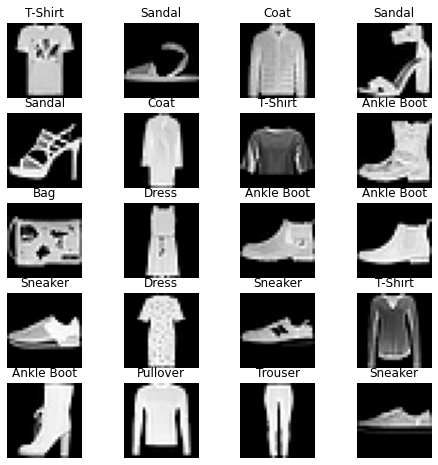

In [5]:
labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress',
              4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt', 7 : 'Sneaker',
              8 : 'Bag', 9 : 'Ankle Boot'}

fig = plt.figure(figsize=(8,8));
columns = 4;
rows = 5;

for i in range(1, columns*rows +1):

    img_xy = np.random.randint(len(train_dataset));
    img = train_dataset[img_xy][0][0,:,:]
    fig.add_subplot(rows, columns, i)
    plt.title(labels_map[train_dataset[img_xy][1]])
    plt.axis('off')
    plt.imshow(img, cmap='gray')
    
plt.show()

모델 생성

In [34]:
class FashionDNN(nn.Module):

  def __init__(self):

    super(FashionDNN, self).__init__()
    self.fc1 = nn.Linear(in_features=784, out_features=256)
    self.drop = nn.Dropout2d(0.25)
    self.fc2 = nn.Linear(in_features=256, out_features=128)
    self.fc3 = nn.Linear(in_features=128, out_features=10)

  def forward(self, input_data):

    out = input_data.view(-1, 784)
    out = F.relu(self.fc1(out))
    out = self.drop(out)
    out = F.relu(self.fc2(out))
    out = self.fc3(out)

    return out

파라미터 정의

In [35]:
model = FashionDNN()
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [36]:
print(model)

FashionDNN(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


모델 학습

In [37]:
num_epochs = 10
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []

In [40]:
num_epochs = 5
count = 0

loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []

for epoch in range(num_epochs):

  for images, labels in train_loader:
    
    images, labels = images.to(device), labels.to(device)
    
    train = Variable(images.view(10, 1, 28, 28))
    labels = Variable(labels)
    
    outputs = model(train)

    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    count += 1
    
    if not (count % 50): 
      
      total = 0
      correct = 0   

      for images, labels in test_loader:

          images, labels = images.to(device), labels.to(device)
          labels_list.append(labels)       

          test = Variable(images.view(10, 1, 28, 28))   

          outputs = model(test)            
          predictions = torch.max(outputs, 1)[1].to(device)
          predictions_list.append(predictions)

          correct += (predictions == labels).sum()            
          total += len(labels)
        
      accuracy = correct * 100 / total
      loss_list.append(loss.data)
      iteration_list.append(count)
      accuracy_list.append(accuracy)
    
    if not (count % 500):
      
      print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))


Iteration: 500, Loss: 0.6199144124984741, Accuracy: 76.76000213623047%
Iteration: 1000, Loss: 0.9222527742385864, Accuracy: 78.12999725341797%
Iteration: 1500, Loss: 0.43014925718307495, Accuracy: 79.52999877929688%
Iteration: 2000, Loss: 0.48520761728286743, Accuracy: 80.5%
Iteration: 2500, Loss: 0.16170816123485565, Accuracy: 80.75%
Iteration: 3000, Loss: 0.43007081747055054, Accuracy: 83.12000274658203%
Iteration: 3500, Loss: 0.3302555978298187, Accuracy: 81.55999755859375%
Iteration: 4000, Loss: 0.9955040812492371, Accuracy: 82.6500015258789%
Iteration: 4500, Loss: 0.33668625354766846, Accuracy: 82.05999755859375%
Iteration: 5000, Loss: 0.46124720573425293, Accuracy: 83.22000122070312%
Iteration: 5500, Loss: 0.23200182616710663, Accuracy: 83.8499984741211%
Iteration: 6000, Loss: 0.16290536522865295, Accuracy: 83.06999969482422%
Iteration: 6500, Loss: 0.09291283786296844, Accuracy: 84.05999755859375%
Iteration: 7000, Loss: 0.6341156959533691, Accuracy: 83.36000061035156%
Iteration: 

합성곱 네트워크 생성

In [8]:
class FashionCNN(nn.Module):

  def __init__(self):

    super(FashionCNN, self).__init__()

    self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1,
                      out_channels=32,
                      kernel_size=3,
                      padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
    
    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels=32,
                  out_channels=64,
                  kernel_size=3),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(2))
    
    self.fc1 = nn.Linear(in_features=64*6*6,
                         out_features=600)
    
    self.drop = nn.Dropout2d(0.25)

    self.fc2 = nn.Linear(in_features=600,
                         out_features=120)
    
    self.fc3 = nn.Linear(in_features=120,
                         out_features=10)
    
  def forward(self, x):

      out = self.layer1(x)
      out = self.layer2(out)
      out = out.view(out.size(0), -1)
      out = self.fc1(out)
      out = self.drop(out)
      out = self.fc2(out)
      out = self.fc3(out)   

      return out

파라미터 설정

In [9]:
learning_rate = 0.001
model = FashionCNN()
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [10]:
print(model)

FashionCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


모델 학습

In [11]:
num_epochs = 5
count = 0

loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []

In [12]:
for epoch in range(num_epochs):

  for images, labels in train_loader:

    images, labels = images.to(device), labels.to(device)

    train = Variable(images.view(10, 1, 28, 28))
    lables = Variable(labels)

    outputs = model(train)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    count += 1

    if not (count % 50):

      total = 0
      correct = 0

      for images, labels in test_loader:

        images, labels = images.to(device), labels.to(device)
        labels_list.append(labels)

        test = Variable(images.view(10, 1, 28, 28))

        outputs = model(test)

        predictions = torch.max(outputs, 1)[1].to(device)
        predictions_list.append(predictions)

        correct += (predictions == labels).sum()

        total += len(labels)

      accuracy = correct * 100 / total
      loss_list.append(loss.data)
      iteration_list.append(count)
      accuracy_list.append(accuracy)

    if not (count % 500):
      
      print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Iteration: 500, Loss: 0.3905070126056671, Accuracy: 77.40999603271484%
Iteration: 1000, Loss: 0.4244270920753479, Accuracy: 83.43000030517578%
Iteration: 1500, Loss: 0.4440625309944153, Accuracy: 84.2699966430664%
Iteration: 2000, Loss: 0.6239215731620789, Accuracy: 81.44999694824219%
Iteration: 2500, Loss: 0.06499137729406357, Accuracy: 86.81999969482422%
Iteration: 3000, Loss: 0.22487635910511017, Accuracy: 86.6199951171875%
Iteration: 3500, Loss: 0.28748562932014465, Accuracy: 85.69999694824219%
Iteration: 4000, Loss: 0.6558636426925659, Accuracy: 87.5199966430664%
Iteration: 4500, Loss: 0.49555715918540955, Accuracy: 85.61000061035156%
Iteration: 5000, Loss: 0.17257146537303925, Accuracy: 86.19999694824219%
Iteration: 5500, Loss: 0.155386283993721, Accuracy: 87.3699951171875%
Iteration: 6000, Loss: 0.11550849676132202, Accuracy: 88.91999816894531%
Iteration: 6500, Loss: 0.04883129149675369, Accuracy: 87.66999816894531%
Iteration: 7000, Loss: 0.19592809677124023, Accuracy: 88.589996

# 전이 학습

라이브러리 불러오기

In [17]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import os
import time
import copy
import glob
import cv2
import shutil

import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

In [14]:
!git clone https://github.com/gilbutITbook/080289.git

Cloning into '080289'...
remote: Enumerating objects: 2273, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 2273 (delta 3), reused 25 (delta 2), pack-reused 2246
Receiving objects: 100% (2273/2273), 330.27 MiB | 25.18 MiB/s, done.
Resolving deltas: 100% (12/12), done.
Checking out files: 100% (2590/2590), done.


In [16]:
!unzip /content/080289/chap05/data/catanddog.zip -d catanddog/

Archive:  /content/080289/chap05/data/catanddog.zip
   creating: catanddog/test/
   creating: catanddog/test/Cat/
  inflating: catanddog/test/Cat/8100.jpg  
  inflating: catanddog/test/Cat/8101.jpg  
  inflating: catanddog/test/Cat/8102.jpg  
  inflating: catanddog/test/Cat/8103.jpg  
  inflating: catanddog/test/Cat/8104.jpg  
  inflating: catanddog/test/Cat/8105.jpg  
  inflating: catanddog/test/Cat/8106.jpg  
  inflating: catanddog/test/Cat/8107.jpg  
  inflating: catanddog/test/Cat/8108.jpg  
  inflating: catanddog/test/Cat/8109.jpg  
  inflating: catanddog/test/Cat/8110.jpg  
  inflating: catanddog/test/Cat/8111.jpg  
  inflating: catanddog/test/Cat/8112.jpg  
  inflating: catanddog/test/Cat/8113.jpg  
  inflating: catanddog/test/Cat/8114.jpg  
  inflating: catanddog/test/Cat/8115.jpg  
  inflating: catanddog/test/Cat/8116.jpg  
  inflating: catanddog/test/Cat/8117.jpg  
  inflating: catanddog/test/Cat/8118.jpg  
  inflating: catanddog/test/Cat/8119.jpg  
  inflating: catanddog/tes

이미지 전처리

In [18]:
data_path = '/content/catanddog/train/'

transform = transforms.Compose([
    transforms.Resize([256, 256]),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()])

train_dataset = torchvision.datasets.ImageFolder(
    data_path,
    transform=transform)

train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=32,
    num_workers=8,
    shuffle=True)

print(len(train_dataset))

385


이미지 출력

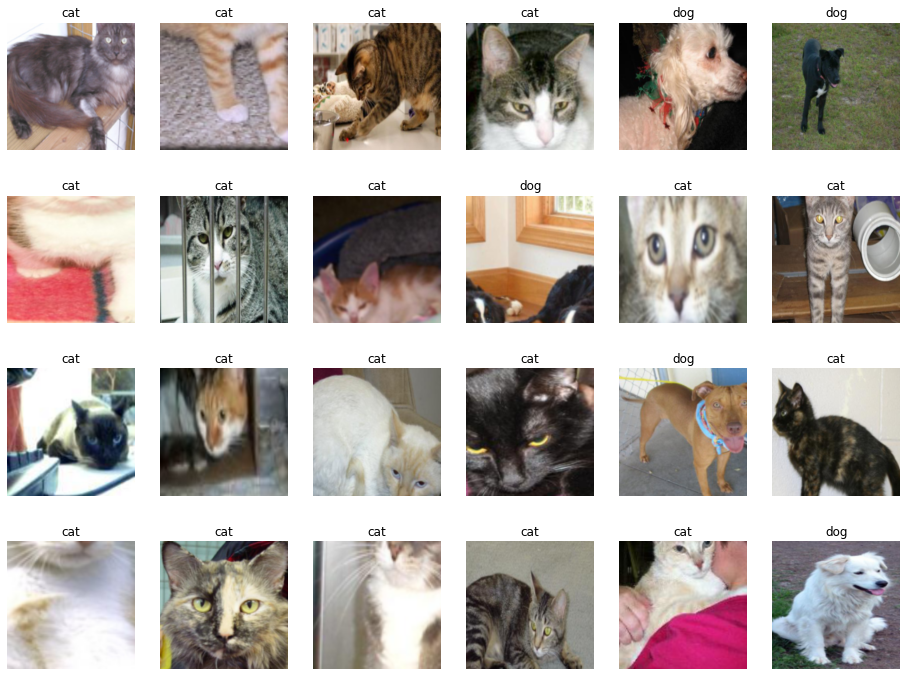

In [19]:
import numpy as np

samples, labels = iter(train_loader).next()
classes = {0:'cat', 1:'dog'}
fig = plt.figure(figsize=(16,24))

for i in range(24):

    a = fig.add_subplot(4,6,i+1)
    a.set_title(classes[labels[i].item()])
    a.axis('off')
    a.imshow(np.transpose(samples[i].numpy(), (1,2,0)))
    
plt.subplots_adjust(bottom=0.2, top=0.6, hspace=0)

사전 학습 모델

In [20]:
resnet18 = models.resnet18(pretrained=True)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

사전 학습 모델 학습 유무 지정

In [21]:
def set_parameter_requires_grad(model, feature_extracting=True):

  if feature_extracting:

    for param in model.parameters():

      param.requires_grad = False

set_parameter_requires_grad(resnet18)

완전 연결 계층 추가

In [22]:
resnet18.fc = nn.Linear(512, 2)

모델 생성

In [23]:
model = models.resnet18(pretrained = True)

for param in model.parameters():

    param.requires_grad = False

model.fc = torch.nn.Linear(512, 2)

for param in model.fc.parameters():

    param.requires_grad = True

optimizer = torch.optim.Adam(model.fc.parameters())
cost = torch.nn.CrossEntropyLoss()

print(model)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

모델 학습 함수

In [24]:
def train_model(model, dataloaders, criterion, optimizer, device, num_epochs=13, is_train=True):

    since = time.time()    
    acc_history = []
    loss_history = []
    best_acc = 0.0
    
    for epoch in range(num_epochs):

        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders:

            inputs = inputs.to(device)
            labels = labels.to(device)
            
            model.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(dataloaders.dataset)
        epoch_acc = running_corrects.double() / len(dataloaders.dataset)

        print('Loss: {:.4f} Acc: {:.4f}'.format(epoch_loss, epoch_acc))

        if epoch_acc > best_acc:

            best_acc = epoch_acc

        acc_history.append(epoch_acc.item())
        loss_history.append(epoch_loss)        
        torch.save(model.state_dict(), os.path.join('catanddog/', '{0:0=2d}.pth'.format(epoch)))
        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best Acc: {:4f}'.format(best_acc))    
    
    return acc_history, loss_history

In [25]:
params_to_update = []

for name,param in resnet18.named_parameters():

    if param.requires_grad == True:
      
        params_to_update.append(param)
        print("\t",name)
            
optimizer = optim.Adam(params_to_update)

	 fc.weight
	 fc.bias


In [27]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()
train_acc_hist, train_loss_hist = train_model(resnet18, train_loader, criterion, optimizer, device)

Epoch 0/12
----------
Loss: 0.6029 Acc: 0.6727

Epoch 1/12
----------
Loss: 0.3695 Acc: 0.8675

Epoch 2/12
----------
Loss: 0.3134 Acc: 0.8753

Epoch 3/12
----------
Loss: 0.3258 Acc: 0.8545

Epoch 4/12
----------
Loss: 0.2586 Acc: 0.9013

Epoch 5/12
----------
Loss: 0.2983 Acc: 0.8883

Epoch 6/12
----------
Loss: 0.3208 Acc: 0.8494

Epoch 7/12
----------
Loss: 0.2703 Acc: 0.8805

Epoch 8/12
----------
Loss: 0.2095 Acc: 0.9169

Epoch 9/12
----------
Loss: 0.2235 Acc: 0.9065

Epoch 10/12
----------
Loss: 0.1900 Acc: 0.9221

Epoch 11/12
----------
Loss: 0.1990 Acc: 0.9091

Epoch 12/12
----------
Loss: 0.1898 Acc: 0.9351

Training complete in 0m 17s
Best Acc: 0.935065


테스트 데이터 전처리

In [28]:
test_path = '/content/catanddog/test/'

transform = transforms.Compose(
                [
                    transforms.Resize(224),
                    transforms.CenterCrop(224),
                    transforms.ToTensor(),
                ])
test_dataset = torchvision.datasets.ImageFolder(
    root=test_path,
    transform=transform
)
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=32,
    num_workers=1,
    shuffle=True
)

print(len(test_dataset))

98


In [29]:
def eval_model(model, dataloaders, device):

    since = time.time()    
    acc_history = []
    best_acc = 0.0

    saved_models = glob.glob('catanddog/' + '*.pth')
    saved_models.sort()
    print('saved_model', saved_models)

    for model_path in saved_models:

        print('Loading model', model_path)

        model.load_state_dict(torch.load(model_path))
        model.eval()
        model.to(device)
        running_corrects = 0

        for inputs, labels in dataloaders:

            inputs = inputs.to(device)
            labels = labels.to(device)

            with torch.no_grad():
                outputs = model(inputs)

            _, preds = torch.max(outputs.data, 1)           
            preds[preds >= 0.5] = 1
            preds[preds < 0.5] = 0
            running_corrects += preds.eq(labels).int().sum()
            
        epoch_acc = running_corrects.double() / len(dataloaders.dataset)
        print('Acc: {:.4f}'.format(epoch_acc))
        
        if epoch_acc > best_acc:
          
            best_acc = epoch_acc

        acc_history.append(epoch_acc.item())
        print()

    time_elapsed = time.time() - since
    print('Validation complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best Acc: {:4f}'.format(best_acc))
    
    return acc_history

평가

In [30]:
val_acc_hist = eval_model(resnet18, test_loader, device)

saved_model ['catanddog/00.pth', 'catanddog/01.pth', 'catanddog/02.pth', 'catanddog/03.pth', 'catanddog/04.pth', 'catanddog/05.pth', 'catanddog/06.pth', 'catanddog/07.pth', 'catanddog/08.pth', 'catanddog/09.pth', 'catanddog/10.pth', 'catanddog/11.pth', 'catanddog/12.pth']
Loading model catanddog/00.pth
Acc: 0.9184

Loading model catanddog/01.pth
Acc: 0.9082

Loading model catanddog/02.pth
Acc: 0.9286

Loading model catanddog/03.pth
Acc: 0.9184

Loading model catanddog/04.pth
Acc: 0.9082

Loading model catanddog/05.pth
Acc: 0.9082

Loading model catanddog/06.pth
Acc: 0.9184

Loading model catanddog/07.pth
Acc: 0.9388

Loading model catanddog/08.pth
Acc: 0.9184

Loading model catanddog/09.pth
Acc: 0.9184

Loading model catanddog/10.pth
Acc: 0.9490

Loading model catanddog/11.pth
Acc: 0.9184

Loading model catanddog/12.pth
Acc: 0.9592

Validation complete in 0m 9s
Best Acc: 0.959184


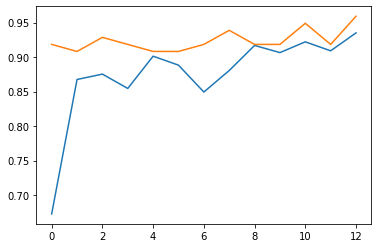

In [31]:
plt.plot(train_acc_hist)
plt.plot(val_acc_hist)
plt.show()

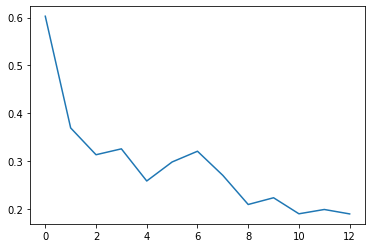

In [32]:
plt.plot(train_loss_hist)
plt.show()

예측 이미지 출력

In [34]:
def im_convert(tensor):  

    image=tensor.clone().detach().numpy()  
    image=image.transpose(1,2,0)  
    image=image*(np.array((0.5,0.5,0.5))+np.array((0.5,0.5,0.5)))  
    image=image.clip(0,1)  
    
    return image  

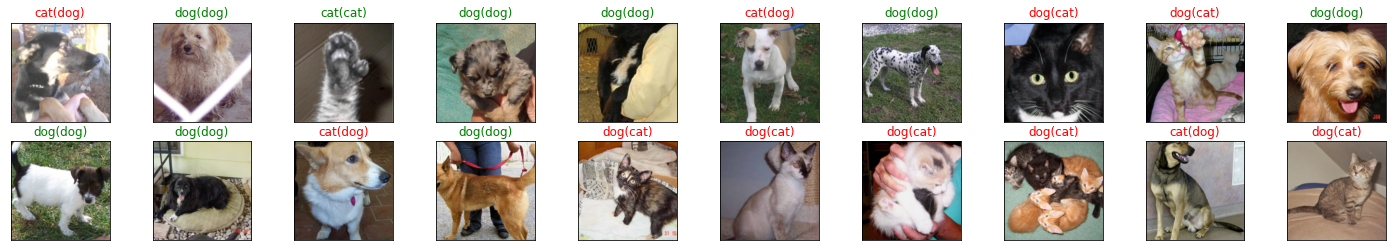

<Figure size 432x288 with 0 Axes>

In [35]:
classes = {0:'cat', 1:'dog'}

dataiter=iter(test_loader)  
images,labels=dataiter.next()  
output=model(images)  
_,preds=torch.max(output,1) 

fig=plt.figure(figsize=(25,4))  

for idx in np.arange(20):  

    ax=fig.add_subplot(2,10,idx+1,xticks=[],yticks=[])  
    plt.imshow(im_convert(images[idx]))  
    a.set_title(classes[labels[i].item()])
    ax.set_title("{}({})".format(str(classes[preds[idx].item()]),str(classes[labels[idx].item()])),color=("green" if preds[idx]==labels[idx] else "red"))  

plt.show()  

plt.subplots_adjust(bottom=0.2, top=0.6, hspace=0)

# 특성 맵 시각화

라이브러리 불러오기

In [36]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import torch
import torch.nn.functional as F
import torch.nn as nn
from torchvision.transforms import ToTensor
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

설명 가능한 네트워크 생성

In [37]:
class XAI(torch.nn.Module):

    def __init__(self, num_classes=2):

        super(XAI, self).__init__()
        
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Conv2d(64, 64, kernel_size=3, padding = 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, padding = 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.Conv2d(128, 128, kernel_size=3, padding = 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, padding = 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.Conv2d(256, 256, kernel_size=3, padding = 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.Conv2d(256, 256, kernel_size=3, padding = 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(256, 512, kernel_size=3, padding = 1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.Conv2d(512, 512, kernel_size=3, padding = 1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.Conv2d(512, 512, kernel_size=3, padding = 1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(512, 512, kernel_size=3, padding = 1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.Conv2d(512, 512, kernel_size=3, padding = 1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.Conv2d(512, 512, kernel_size=3, padding = 1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Linear(512, 512, bias=False),
            nn.Dropout(0.5),
            nn.BatchNorm1d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(-1, 512)
        x = self.classifier(x)
        return F.log_softmax(x)

In [38]:
model=XAI()
model.cpu()
model.eval()

XAI(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.3, inplace=False)
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (13): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU(inplace=True

특성 맵을 확인

In [39]:
class LayerActivations:

    features=[]

    def __init__(self, model, layer_num):

        self.hook = model[layer_num].register_forward_hook(self.hook_fn)
   
    def hook_fn(self, module, input, output):

        output = output
        self.features = output.detach().numpy()

    def remove(self): 
      
        self.hook.remove()

이미지 불러오기

torch.Size([1, 3, 100, 100])


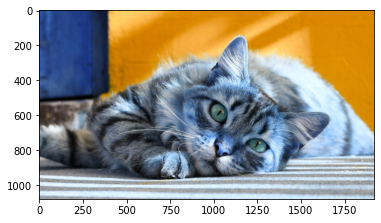

In [40]:
cat_path = '/content/080289/chap05/data/cat.jpg'

img=cv2.imread(cat_path)   
plt.imshow(img)
img = cv2.resize(img, (100, 100), interpolation=cv2.INTER_LINEAR)
img = ToTensor()(img).unsqueeze(0)

print(img.shape)

Conv2d 특성 맵 확인

In [41]:
result = LayerActivations(model.features, 0)
model(img)
activations = result.features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:78: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


특성 맵 확인

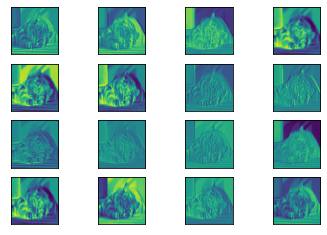

<Figure size 864x576 with 0 Axes>

In [42]:
fig, axes = plt.subplots(4,4)
fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for row in range(4):

    for column in range(4):

        axis = axes[row][column]
        axis.get_xaxis().set_ticks([])
        axis.get_yaxis().set_ticks([])
        axis.imshow(activations[0][row*10+column])
        
plt.show()